<a href="https://colab.research.google.com/github/jonathanAmancioSales/Ciencia_de_Dados-Pandas_KNeighborsClassifier/blob/main/Ciencia_de_Dados_-_KNeighborsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import urllib.request
from urllib.parse import urlparse

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Baixando o DataSet

In [2]:
def download_dataset():
  dataset_url = ["https://raw.githubusercontent.com/feulo-ocean/ciencia_de_dados/master/train.csv",
                 "https://raw.githubusercontent.com/feulo-ocean/ciencia_de_dados/master/test.csv"]

  for url in dataset_url:
    url_parse = urlparse(url)
    file_name = url_parse.path.split('/')[-1]
    if not os.path.exists(file_name):
      File = urllib.request.urlretrieve(url, file_name)

download_dataset()

print(os.listdir())

['.config', 'test.csv', 'train.csv', 'submission.csv', 'sample_data']


## Análise exploratória

In [ ]:
"""Informações dos atributos
* Atributos de Entrada

-Relacionadas a informação bancária
age (numeric)
job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid",
                                "management","retired","self-employed","services",
                                "student","technician","unemployed","unknown")
marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate",
                        "professional.course","university.degree","unknown")
default: has credit in default? (categorical: "no","yes","unknown")
housing: has housing loan? (categorical: "no","yes","unknown")
loan: has personal loan? (categorical: "no","yes","unknown")
Relacionadas com o último contato dessa mesma campanha
contact: contact communication type (categorical: "cellular","telephone")
month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
duration: last contact duration, in seconds (numeric).
    Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no").
    Yet, the duration is not known before a call is performed. Also, after the end of the call y is
    obviously known. Thus, this input should only be included for benchmark purposes and should be
    discarded if the intention is to have a realistic predictive model.

-Outros atributos
campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
pdays: number of days that passed by after the client was last contacted from a previous campaign
       (numeric; 999 means client was not previously contacted)
previous: number of contacts performed before this campaign and for this client (numeric)
poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
Atributos de contexto social e econômico
emp.var.rate: employment variation rate - quarterly indicator (numeric)
cons.price.idx: consumer price index - monthly indicator (numeric)
cons.conf.idx: consumer confidence index - monthly indicator (numeric)
euribor3m: euribor 3 month rate - daily indicator (numeric)
nr.employed: number of employees - quarterly indicator (numeric)

* Atributo Alvo
y - has the client subscribed a term deposit? (binary: "yes","no")"""

In [4]:
df = pd.read_csv('train.csv', index_col='id')

In [5]:
df.head(6)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,technician,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,36,management,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4,60,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
5,57,retired,married,basic.6y,NaN,no,no,cellular,apr,fri,203,2,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no


In [6]:
#Amostra aleatória:
df.sample(8)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
21548,39,blue-collar,married,basic.9y,no,no,yes,cellular,may,mon,124,3,999,2,failure,-1.8,92.893,-46.2,1.354,5099.1,no
12391,55,management,married,basic.4y,NaN,no,no,cellular,apr,thu,594,2,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1,no
173,44,blue-collar,married,basic.6y,no,yes,yes,cellular,aug,tue,222,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
8474,34,admin.,married,high.school,NaN,yes,no,cellular,aug,fri,96,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
22544,52,services,married,basic.6y,no,yes,no,cellular,apr,mon,44,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
34014,35,NaN,married,basic.9y,no,yes,no,cellular,aug,tue,148,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
6499,52,entrepreneur,married,high.school,no,yes,no,cellular,may,thu,69,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no
25383,42,admin.,divorced,high.school,no,yes,no,telephone,nov,mon,124,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
#df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             36773 non-null  object 
 2   marital         37000 non-null  object 
 3   education       35505 non-null  object 
 4   default         29296 non-null  object 
 5   housing         36176 non-null  object 
 6   loan            36176 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  duration        37069 non-null  int64  
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  object 
 15  emp.var.rate    37069 non-null  float64
 16  cons.price.idx  37069 non-null  float64
 17  cons.conf.idx   37069 non-null 

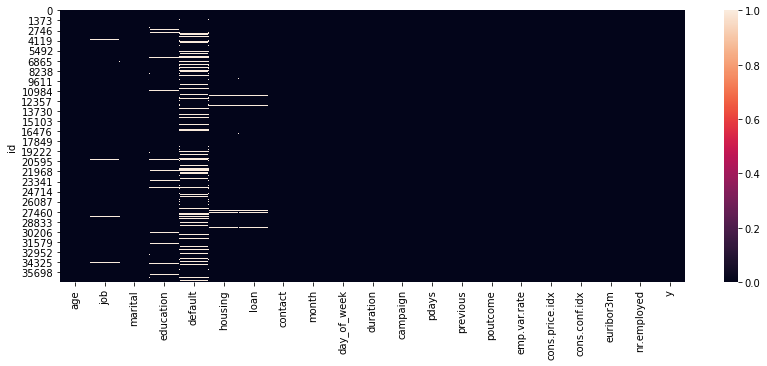

In [8]:
#Verificando valores nulos:
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull())
plt.show()

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.023497,258.185492,2.566862,962.058189,0.173946,0.082222,93.576416,-40.505555,3.620484,5166.966047
std,10.412653,259.579105,2.765626,187.939691,0.497441,1.571009,0.578585,4.623600,1.735310,72.360902
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,36773,37000,35505,29296,36176,36176,37069,37069,37069,37069,37069
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9364,22424,10967,29293,19432,30518,23515,12424,7735,31989,32893


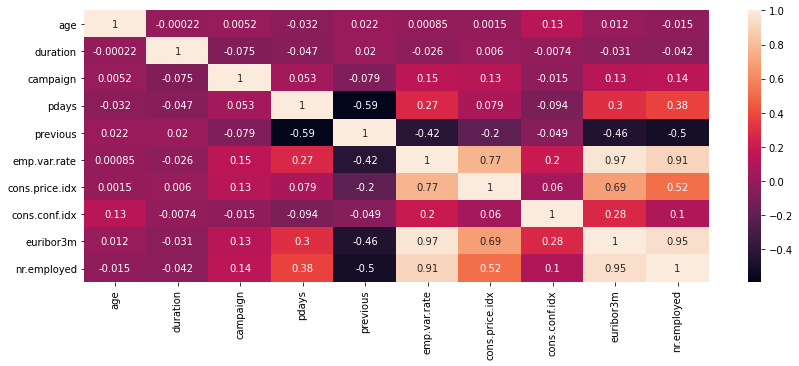

In [11]:
#Correlação entre os atributos/variáveis:
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

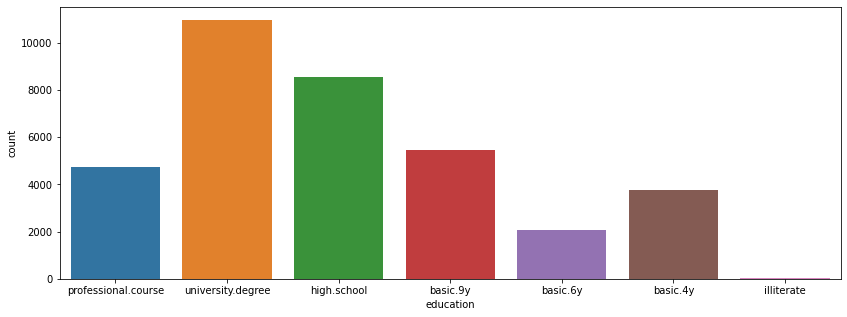

In [12]:
plt.figure(figsize=(14,5))
sns.countplot(data=df, x='education'); plt.show()

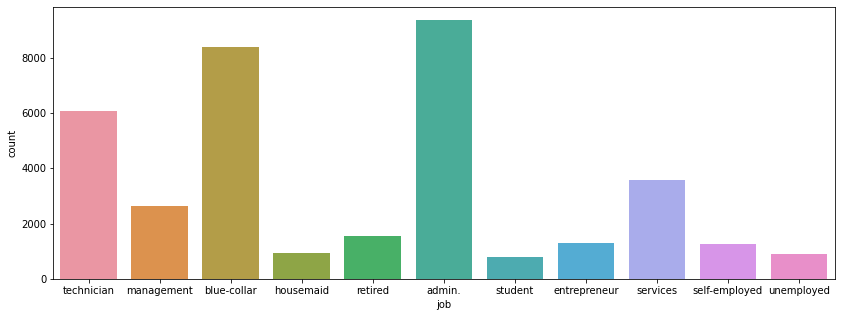

In [13]:
plt.figure(figsize=(14,5))
sns.countplot(data=df, x='job'); plt.show()
#sns.countplot(data=df, x='job', palette='tab10'); plt.show()

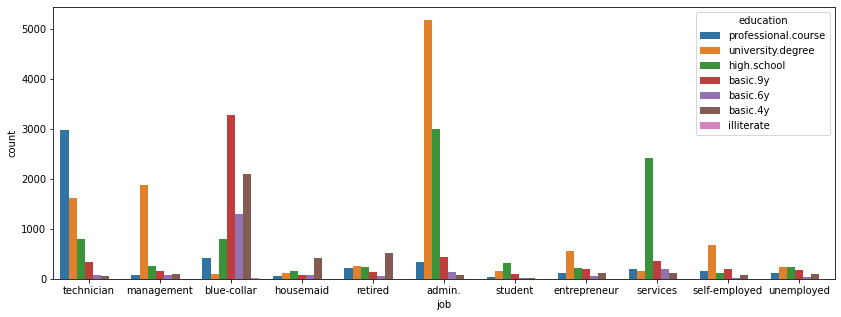

In [14]:
plt.figure(figsize=(14,5))
sns.countplot(data=df, x='job', hue='education'); plt.show()

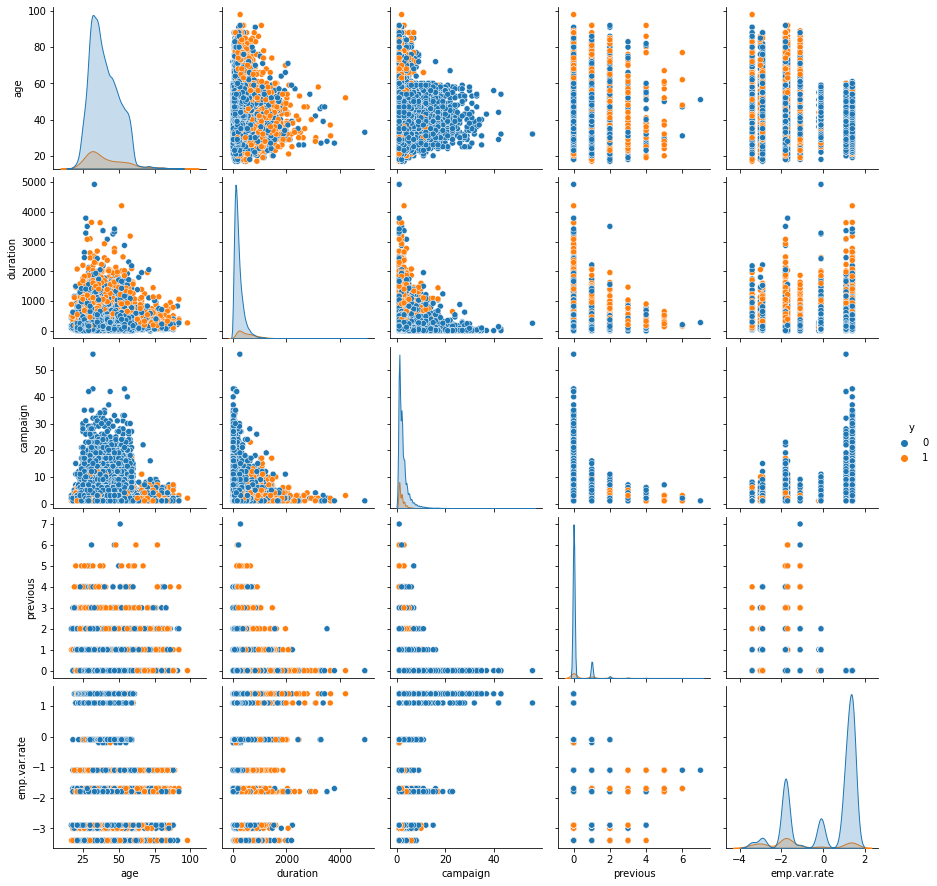

CPU times: user 58.9 s, sys: 3.45 s, total: 1min 2s
Wall time: 58.5 s


In [57]:
%%time
variaveis=['age', 'duration', 'campaign', 'previous', 'emp.var.rate']
#variaveis=['age', 'duration', 'campaign']
sns.pairplot(df, hue='y', diag_kind='kde', x_vars=variaveis, y_vars=variaveis)
plt.show()

In [16]:
#Proporção das classes:
print( df.value_counts('y') )

no =df.value_counts('y')[0]
yes=df.value_counts('y')[1]
print('\ny: no =', no, 'Proporção: ', round( no/(yes+no),4) )
print('y: yes=', yes, ' Proporção: ', round(yes/(yes+no),4) )

y  
no     32893
yes     4176
dtype: int64

y: no = 32893 Proporção:  0.8873
y: yes= 4176  Proporção:  0.1127


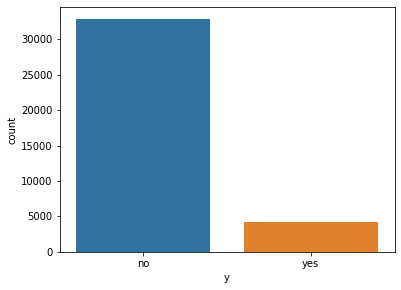

In [17]:
plt.figure(figsize=(6,4.5))
sns.countplot(data=df, x='y'); plt.show()

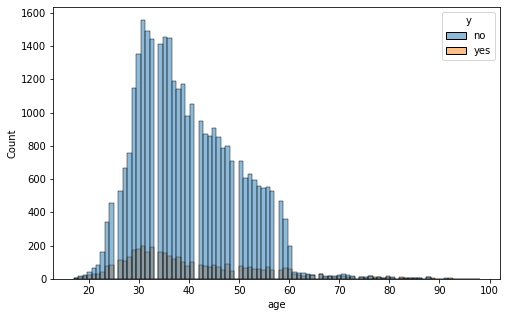

In [18]:
plt.figure(figsize=(8,5.0))
sns.histplot(data=df, x='age', hue='y')
#sns.histplot(data=df, x='age', hue='y', kde=True)
plt.show()

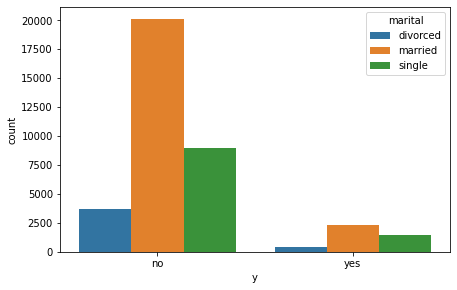

In [19]:
plt.figure(figsize=(7,4.5))
sns.countplot(data=df, x='y', hue='marital'); plt.show()

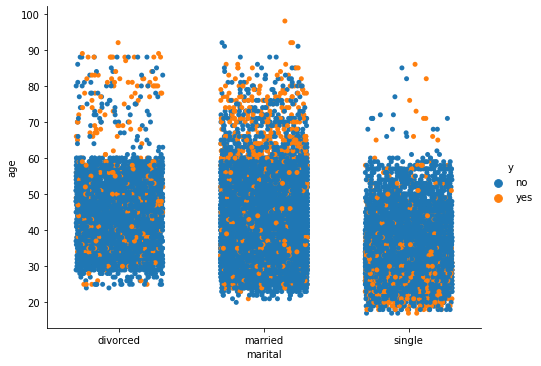

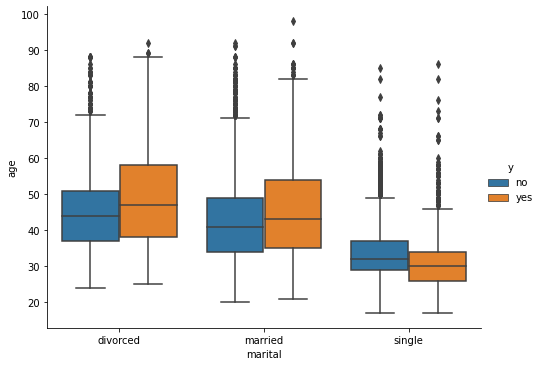

In [20]:
sns.catplot(data=df, x='marital', y='age', hue='y', jitter=0.3, aspect=8/6)
sns.catplot(data=df, x='marital', y='age', hue='y', kind='box', aspect=8/6)

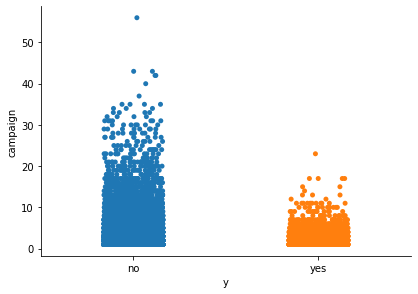

In [21]:
sns.catplot(data=df, x='y', y='campaign', jitter=0.16, aspect=4/2.8, height=4)

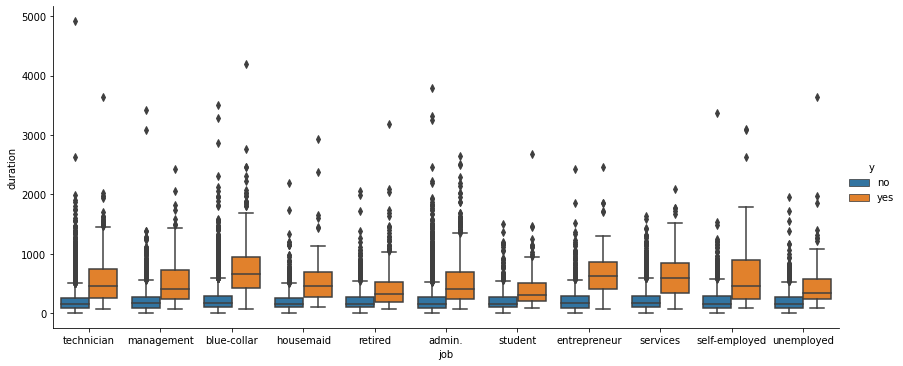

In [22]:
sns.catplot(data=df, x='job', y='duration', hue='y',kind='box', aspect=7/3, height=5)

In [23]:
df[df.y=='yes'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,40.902299,551.579502,2.055316,790.203305,0.494732,-1.220690,93.361787,-39.819397,2.131688,5095.297031
std,13.831597,400.507671,1.667744,404.722734,0.863898,1.621333,0.675989,6.101435,1.745427,87.923517
min,17.000000,63.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,252.750000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.853250,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.503500,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [24]:
print('Numero de chamadas cuja duration> 60 segundos: ', df.duration[df.duration >60].count() )
print('Numero de chamadas cuja duration<=60 segundos: ', df.duration[df.duration<=60].count() )
print('Numero de chamadas cuja duration==0  segundos: ', df.duration[df.duration== 0].count() )

Numero de chamadas cuja duration> 60 segundos:  33222
Numero de chamadas cuja duration<=60 segundos:  3847
Numero de chamadas cuja duration==0  segundos:  4


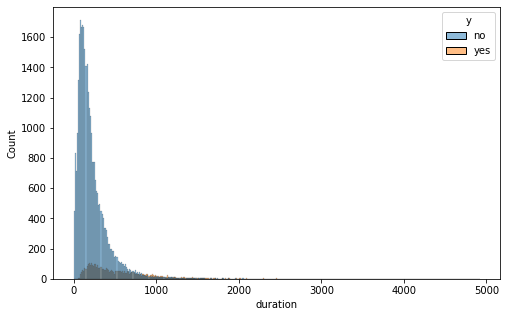

In [25]:
plt.figure(figsize=(8,5.0))
sns.histplot(data=df, x='duration', hue='y'); plt.show()

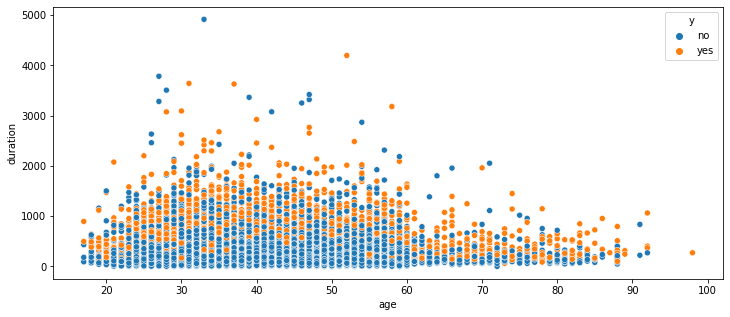

In [26]:
plt.figure(figsize=(12,5.0))
sns.scatterplot(x='age', y='duration', data=df, hue='y'); plt.show()

__________________

## Transformação dos Dados

In [27]:
#Transforma objetos_string em categorias:
for col in df.columns[df.dtypes=='object']:
  df[col]= df[col].astype('category')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             37069 non-null  int64   
 1   job             36773 non-null  category
 2   marital         37000 non-null  category
 3   education       35505 non-null  category
 4   default         29296 non-null  category
 5   housing         36176 non-null  category
 6   loan            36176 non-null  category
 7   contact         37069 non-null  category
 8   month           37069 non-null  category
 9   day_of_week     37069 non-null  category
 10  duration        37069 non-null  int64   
 11  campaign        37069 non-null  int64   
 12  pdays           37069 non-null  int64   
 13  previous        37069 non-null  int64   
 14  poutcome        37069 non-null  category
 15  emp.var.rate    37069 non-null  float64 
 16  cons.price.idx  37069 non-null  float64 
 17  cons.conf.id

In [29]:
df.job.cat.categories
#df.job.cat.codes

Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed'],
      dtype='object')

In [30]:
df.education.cat.categories

Index(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree'],
      dtype='object')

In [31]:
df.education.cat.reorder_categories(['illiterate','basic.4y', 'basic.6y', 'basic.9y', 'high.school',
                                     'professional.course', 'university.degree'], ordered=True, inplace=True)

In [32]:
df.education

id
0        professional.course
1          university.degree
2                high.school
3                   basic.9y
4                high.school
                ...         
37064            high.school
37065    professional.course
37066               basic.9y
37067      university.degree
37068      university.degree
Name: education, Length: 37069, dtype: category
Categories (7, object): ['illiterate' < 'basic.4y' < 'basic.6y' < 'basic.9y' < 'high.school' <
                         'professional.course' < 'university.degree']

In [33]:
df.month.cat.reorder_categories(['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                                ordered=True, inplace=True)

df.day_of_week.cat.reorder_categories(['mon','tue','wed','thu','fri'], ordered=True, inplace=True)

In [34]:
print(df.month.cat.categories)
print(df.day_of_week.cat.categories)

Index(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], dtype='object')
Index(['mon', 'tue', 'wed', 'thu', 'fri'], dtype='object')


In [35]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,technician,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,36,management,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4,60,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [36]:
#Transforma as categorias em números/códigos:
for col in df.columns[df.dtypes=='category']:
  df[col]= df[col].cat.codes

In [37]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,9,0,5,-1,1,0,1,3,0,56,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1,0
1,36,4,1,6,0,1,0,0,8,1,267,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
2,53,1,1,4,0,1,1,0,4,0,243,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
3,45,1,2,3,0,1,0,0,5,2,249,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2,0
4,60,3,1,4,-1,1,0,1,2,2,74,1,999,0,1,1.1,93.994,-36.4,4.858,5191.0,0


_______________________________

# Modelando

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [39]:
#Separa os labels do conjunto de parâmetros
y = df.y
X = df.drop('y', axis=1)  #Remover coluna y;

In [40]:
#Visualização do conjunto de treino
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
id,,,,,,,,,,,,,,,,,,,,
0,52,9,0,5,-1,1,0,1,3,0,56,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1
1,36,4,1,6,0,1,0,0,8,1,267,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8
2,53,1,1,4,0,1,1,0,4,0,243,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1
3,45,1,2,3,0,1,0,0,5,2,249,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2
4,60,3,1,4,-1,1,0,1,2,2,74,1,999,0,1,1.1,93.994,-36.4,4.858,5191.0


In [41]:
#Separar dados de treino e de teste:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42, shuffle=True, stratify=y)

In [42]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((31508, 20), (31508,), (5561, 20), (5561,))

In [43]:
#Verificar se dividiu na proporção correta:
sum(y_train)/len(y_train), sum(y_test)/len(y_test)

(0.11266979814650248, 0.11256968171192232)

_________________

In [44]:
#Padronizar dados:
scaler_std = StandardScaler().fit(X_train)
X_std = scaler_std.transform(X_train)

pd.DataFrame(X_std, columns=df.columns.drop('y')).describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04,3.150800e+04
mean,-8.971848e-17,-7.463456e-16,-7.964480e-16,4.729124e-16,-8.997289e-16,7.514478e-17,6.852318e-16,-8.640134e-16,-1.037739e-15,1.358783e-15,8.101337e-17,-6.631458e-17,-1.395476e-15,3.566082e-16,5.895091e-16,9.635945e-16,-4.919541e-16,1.582642e-15,-5.006011e-17,9.724455e-15
std,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,-2.217403e+00,-1.300134e+00,-3.546396e+00,-2.581038e+00,-1.952396e+00,-2.743465e+00,-2.814524e+00,-7.607854e-01,-1.764544e+00,-1.404938e+00,-9.928566e-01,-5.676504e-01,-5.165349e+00,-3.489286e-01,-2.559993e+00,-2.220303e+00,-2.380231e+00,-2.225350e+00,-1.722360e+00,-2.819130e+00
25%,-7.722695e-01,-1.019310e+00,-2.713924e-01,-4.919673e-01,5.115989e-01,-9.142949e-01,-3.200086e-01,-7.607854e-01,-7.834566e-01,-6.961591e-01,-6.010295e-01,-5.676504e-01,1.948053e-01,-3.489286e-01,1.957384e-01,-1.200159e+00,-8.677839e-01,-4.714068e-01,-1.312900e+00,-9.410999e-01
50%,-1.942163e-01,-4.576625e-01,-2.713924e-01,3.030041e-02,5.115989e-01,9.148754e-01,-3.200086e-01,-7.607854e-01,-2.929127e-01,1.261981e-02,-3.013970e-01,-2.053311e-01,1.948053e-01,-3.489286e-01,1.957384e-01,6.488538e-01,2.985653e-01,-2.765242e-01,7.130629e-01,3.326344e-01
75%,6.728635e-01,9.464573e-01,1.366109e+00,1.074836e+00,5.115989e-01,9.148754e-01,-3.200086e-01,1.314431e+00,6.881751e-01,7.213988e-01,2.325634e-01,1.569882e-01,1.948053e-01,-3.489286e-01,1.957384e-01,8.401309e-01,7.225349e-01,8.927714e-01,7.730401e-01,8.468405e-01
max,5.586316e+00,1.788929e+00,1.366109e+00,1.074836e+00,2.975594e+00,9.148754e-01,2.174507e+00,1.314431e+00,2.650351e+00,1.430178e+00,1.789936e+01,1.935991e+01,1.948053e-01,1.373826e+01,2.951469e+00,8.401309e-01,2.060202e+00,2.949866e+00,8.214833e-01,8.468405e-01


In [45]:
#Normalizar dados (Dimensionar para o mesmo intervalo):
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X_train)

pd.DataFrame(X_norm, columns=df.columns.drop('y')).describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000,31508.000000
mean,0.284147,0.420883,0.721912,0.705998,0.396185,0.749921,0.564142,0.366605,0.399680,0.495549,0.052554,0.028486,0.963657,0.024769,0.464485,0.725486,0.536036,0.430001,0.677070,0.769000
std,0.128146,0.323728,0.203565,0.273537,0.202926,0.273352,0.200443,0.481885,0.226510,0.352725,0.052933,0.050183,0.186565,0.070988,0.181443,0.326756,0.225207,0.193232,0.393112,0.272783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.090909,0.666667,0.571429,0.500000,0.500000,0.500000,0.000000,0.222222,0.250000,0.020740,0.000000,1.000000,0.000000,0.500000,0.333333,0.340608,0.338912,0.160961,0.512287
50%,0.259259,0.272727,0.666667,0.714286,0.500000,1.000000,0.500000,0.000000,0.333333,0.500000,0.036600,0.018182,1.000000,0.000000,0.500000,0.937500,0.603274,0.376569,0.957379,0.859735
75%,0.370370,0.727273,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.555556,0.750000,0.064864,0.036364,1.000000,0.000000,0.500000,1.000000,0.698753,0.602510,0.980957,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


_______________________

## k-nearest neighbors

In [46]:
knn_class = KNeighborsClassifier()
knn_class.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
y_pred = knn_class.predict(X_test)

print( metrics.classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4935
           1       0.59      0.51      0.54       626

    accuracy                           0.90      5561
   macro avg       0.76      0.73      0.74      5561
weighted avg       0.90      0.90      0.90      5561



___________________

In [48]:
knn_class_norm = KNeighborsClassifier()
knn_class_norm.fit(X_norm,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
y_pred = knn_class_norm.predict( scaler.fit_transform(X_test) )

print( metrics.classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      4935
           1       0.62      0.34      0.44       626

    accuracy                           0.90      5561
   macro avg       0.77      0.66      0.69      5561
weighted avg       0.89      0.90      0.89      5561



_____________________

In [50]:
knn_class_std = KNeighborsClassifier()
knn_class_std.fit(X_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:
y_pred = knn_class_std.predict( scaler_std.fit_transform(X_test) )

print( metrics.classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4935
           1       0.59      0.42      0.49       626

    accuracy                           0.90      5561
   macro avg       0.76      0.69      0.72      5561
weighted avg       0.89      0.90      0.90      5561



___________________________
___________________________

# Submetendo para o Kaggle

In [52]:
aval = pd.read_csv('test.csv', index_col='id')

In [53]:
#Transforma objetos_string em categorias:
for col in aval.columns[aval.dtypes=='object']:
  aval[col]= aval[col].astype('category')

aval.education.cat.reorder_categories(['illiterate','basic.4y', 'basic.6y', 'basic.9y', 'high.school',
                                       'professional.course', 'university.degree'], ordered=True, inplace=True)
aval.month.cat.reorder_categories(['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],ordered=True, inplace=True)
aval.day_of_week.cat.reorder_categories(['mon','tue','wed','thu','fri'], ordered=True, inplace=True)

#Transforma as categorias em números_códigos:
for col in aval.columns[aval.dtypes=='category']:
  aval[col]= aval[col].cat.codes

In [54]:
y_aval = knn_class.predict(aval)

#y_aval2 = knn_class_norm.predict( scaler.fit_transform(aval) )
#y_aval3 = knn_class_std.predict( scaler_std.fit_transform(aval) )

In [55]:
sub=pd.Series(y_aval).to_frame()
sub.to_csv('submission.csv')

In [56]:
sub.sample(6)

,0
2337,0
276,0
2123,0
3837,1
1056,0
1253,0


___________________
___________________